In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [ ]:
#Replacing euro symbol 
df['Value']=df['Value'].str.replace('€','')
df['Value']

In [7]:
#function for converting suffix to respective multiple
def convert_value(string):
    if 'M' in string:
        return float(string.strip('M'))*1000000
    elif 'K' in string:
        return float(string.strip('K'))*1000


In [ ]:
#using defined function
df['Value']=df['Value'].apply(convert_value)

In [6]:
#Replacing and coverting 
df['Wage']=df['Wage'].str.replace('€','')
df['Wage']=df['Wage'].apply(convert_value)
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [11]:
df['Release Clause']=df['Release Clause'].str.replace('€','')
df['Release Clause']

0        226.5M
1        127.1M
2        228.1M
3        138.6M
4        196.4M
          ...  
18202      143K
18203      113K
18204      165K
18205      143K
18206      165K
Name: Release Clause, Length: 18207, dtype: object

In [12]:
#finding for null count 
df['Release Clause'].isnull().sum()/len(df)*100

8.590102707749766

In [13]:
#as the null count is not more than 10% ingnoring the null values 
df.dropna(subset=['Release Clause'],inplace=True)

In [14]:
#converting to float value 
df['Release Clause']=df['Release Clause'].apply(convert_value)
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 16643, dtype: float64

In [15]:
#replacing and converting weight to float value 
df['Weight']=df['Weight'].str.replace('lbs','').astype('float')

In [16]:
#function to convert feet in inches to feet in decimal

def height_in_feet(string):
    return float(string.split("'")[0])+float(string.split("'")[1])*0.084


In [17]:
#converting feet in inches to feet in decimal
df['Height']=df['Height'].apply(height_in_feet)

In [18]:
df['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 16643, dtype: object

In [19]:
import datetime as dt


In [20]:
#coverting year in string to date type
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

In [21]:
#converting Joined year to int 
df['Joined']=pd.to_datetime(df['Joined']).dt.year.astype('int32')

In [22]:
#checking for null value percentage in all columns 
p=df.isnull().sum()/len(df)*100
p[p>0]

Loaned From    100.0
dtype: float64

In [23]:
#droping column which has 100% null values 

df.drop(columns=['Loaned From'],inplace=True)


In [ ]:
#1.	Plot the distribution of Overall rating for all players. 

In [24]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


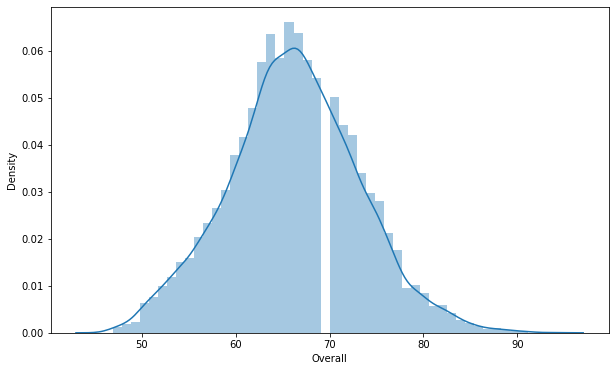

In [25]:
plt.figure(figsize=(10,6))
sb.distplot(df['Overall'])
plt.show()

***The above distribution plot represents the normal distrbution

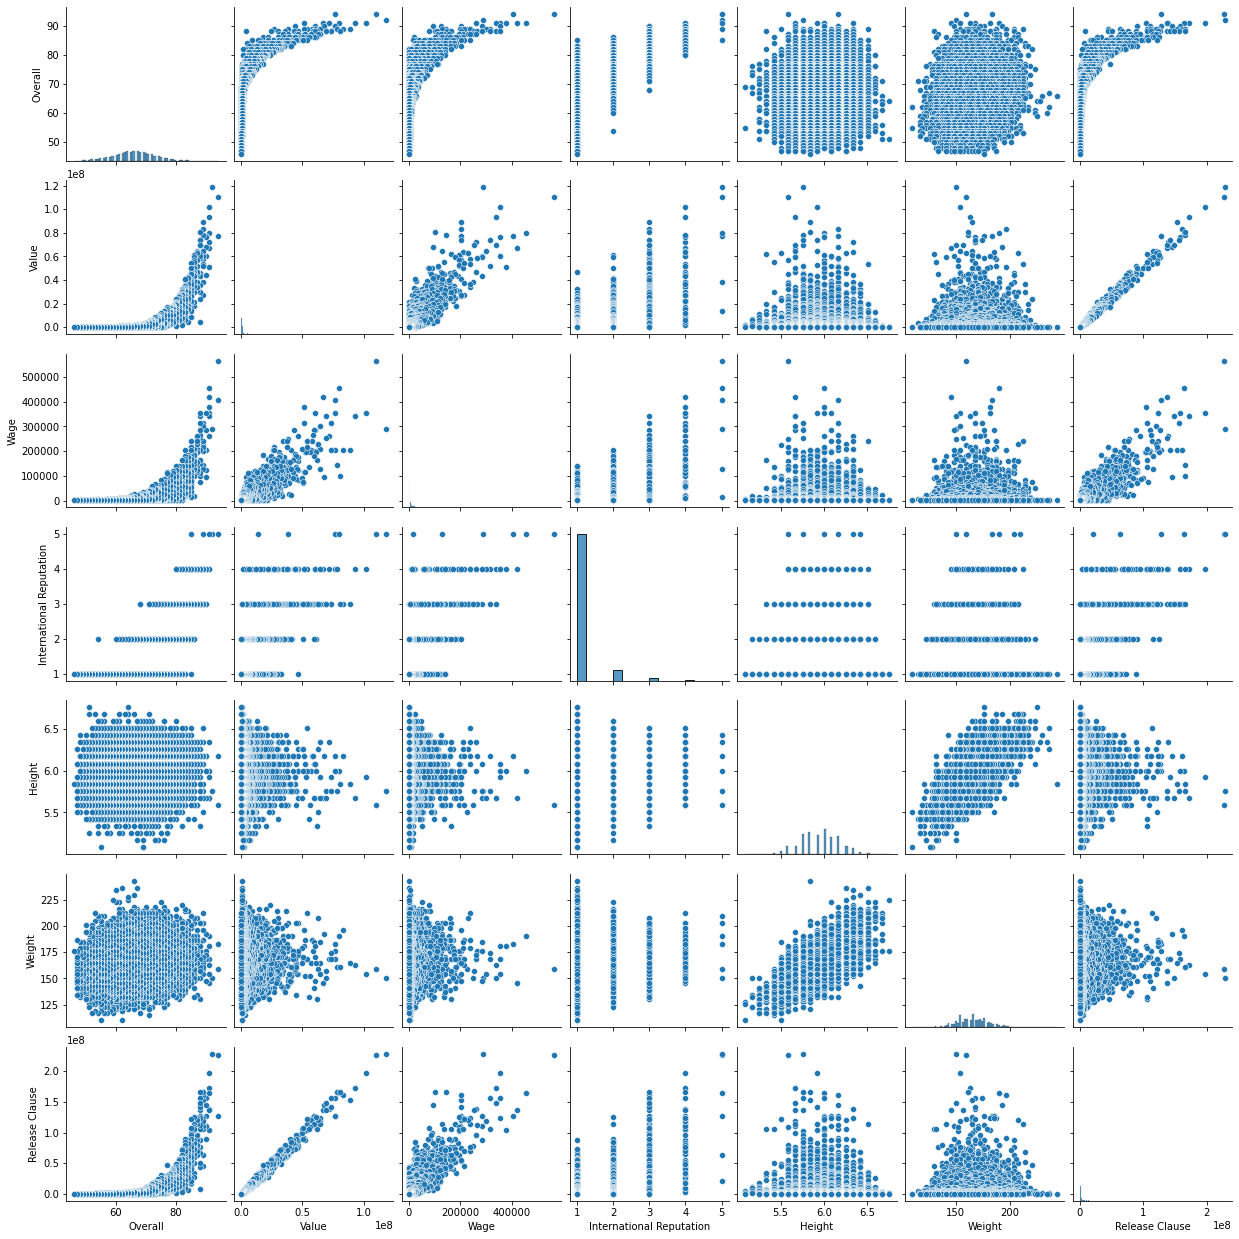

In [74]:
#2.	Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
sb.pairplot(data=df,vars=['Overall', 'Value', 'Wage','International Reputation', 'Height','Weight', 'Release Clause'])
plt.show()

In [ ]:
#3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
#a)	What would the average wage for this set of players be?
#b)	What is the average age?
#c)	Is there a correlation between the Overall rating and Value for these players?


In [28]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [36]:
#3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

df_2020=df[df['Contract Valid Until'].dt.year==2020].sort_values(by=['Overall'],ascending=False).head(20)
df_2020

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


In [41]:
##a)	What would the average wage for this set of players be?


print('Average Wage for the select 20 players:',df_2020['Wage'].mean())



Average Wage for the select 20 players: 205450.0


In [42]:
#b)	What is the average age?
print('Average Age for the select 20 players:',df_2020['Age'].mean())


Average Age for the select 20 players: 30.65


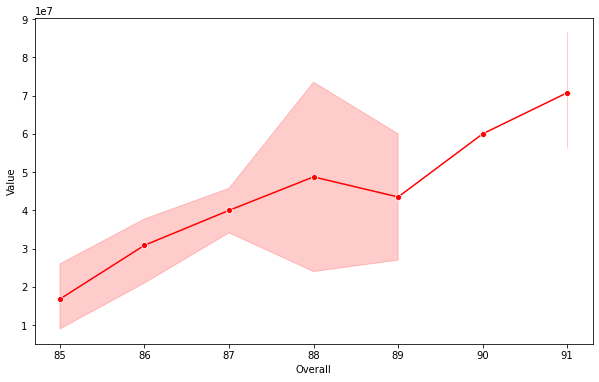

In [50]:
#c)	Is there a correlation between the Overall rating and Value for these players?

plt.figure(figsize=(10,6))
sb.lineplot(data=df_2020,x='Overall',y='Value',marker='o',color='r')
plt.show()


***From the above plot, we can observe there is an inclination in the graph as the overall rating increase the value also increases.

In [ ]:
#4.	Generate tables containing the top 5 players by Overall rating for each unique position.
#a)	Are there any players appearing in more than one Table. Please point out such players.
#b)	What is the average wage one can expect to pay for the top 5 in every position?


In [57]:
#4.	Generate tables containing the top 5 players by Overall rating for each unique position.

df_ST=df[df['Position']=='ST'].sort_values(by=['Overall'],ascending=False).head(5)
df_GK=df[df['Position']=='GK'].sort_values(by=['Overall'],ascending=False).head(5)
df_CB=df[df['Position']=='CB'].sort_values(by=['Overall'],ascending=False).head(5)
df_CM=df[df['Position']=='CM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LB=df[df['Position']=='LB'].sort_values(by=['Overall'],ascending=False).head(5)
df_RB=df[df['Position']=='RB'].sort_values(by=['Overall'],ascending=False).head(5)
df_RM=df[df['Position']=='RM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LM=df[df['Position']=='LM'].sort_values(by=['Overall'],ascending=False).head(5)
df_CAM=df[df['Position']=='CAM'].sort_values(by=['Overall'],ascending=False).head(5)
df_CDM=df[df['Position']=='CDM'].sort_values(by=['Overall'],ascending=False).head(5)
df_RCB=df[df['Position']=='RCB'].sort_values(by=['Overall'],ascending=False).head(5)
df_LCB=df[df['Position']=='LCB'].sort_values(by=['Overall'],ascending=False).head(5)
df_LCM=df[df['Position']=='LCM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LW=df[df['Position']=='LW'].sort_values(by=['Overall'],ascending=False).head(5)
df_RW=df[df['Position']=='RW'].sort_values(by=['Overall'],ascending=False).head(5)
df_RDM=df[df['Position']=='RDM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LDM=df[df['Position']=='LDM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LS=df[df['Position']=='LS'].sort_values(by=['Overall'],ascending=False).head(5)
df_RS=df[df['Position']=='RS'].sort_values(by=['Overall'],ascending=False).head(5)
df_RWB=df[df['Position']=='RWB'].sort_values(by=['Overall'],ascending=False).head(5)
df_LWB=df[df['Position']=='LWB'].sort_values(by=['Overall'],ascending=False).head(5)
df_CF=df[df['Position']=='CF'].sort_values(by=['Overall'],ascending=False).head(5)
df_RAM=df[df['Position']=='RAM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LAM=df[df['Position']=='LAM'].sort_values(by=['Overall'],ascending=False).head(5)
df_LF=df[df['Position']=='LF'].sort_values(by=['Overall'],ascending=False).head(5)
df_RF=df[df['Position']=='RF'].sort_values(by=['Overall'],ascending=False).head(5)

In [65]:
#a)	Are there any players appearing in more than one Table. Please point out such players.

lst=[df_ST.ID,df_GK.ID,df_CB.ID,df_CM.ID,df_LB.ID,df_RB.ID,df_RM.ID,df_LM.ID,df_CAM.ID,df_CDM.ID,df_RCB.ID,df_LCB.ID,df_LCM.ID,df_LW.ID,df_RW.ID,df_RDM.ID,df_LDM.ID,df_LS.ID,df_RS.ID,df_RWB.ID,df_LWB.ID,df_CF.ID,df_RAM.ID,df_LAM.ID,df_LF.ID,df_RF.ID]

from functools import reduce
reduce(np.intersect1d,lst)

array([], dtype=int64)

***INFERENCE: There are no unique players found from the genarated table for top 5 players in each position. 

In [58]:
##b)	What is the average wage one can expect to pay for the top 5 in every position?
df.groupby('Position')['Wage'].mean()

Position
CAM    10171.037628
CB      7673.754557
CDM     9412.371134
CF     10060.606061
CM      8143.416928
GK      6726.842105
LAM    11700.000000
LB      8798.855274
LCB    11805.042017
LCM    13716.713881
LDM    10660.714286
LF     44666.666667
LM      9516.798419
LS     14108.695652
LW     12997.041420
LWB     8631.578947
RAM    19095.238095
RB      8594.662219
RCB    12868.292683
RCM    14397.183099
RDM    12109.649123
RF     60923.076923
RM      9345.401174
RS     13664.804469
RW     14375.384615
RWB     8404.761905
ST      9675.155925
Name: Wage, dtype: float64